### Packages

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

import gc

import keras
from PIL import Image


from scipy import stats

from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D , MaxPool2D , Flatten , Dropout, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.utils import Sequence

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf


import cv2
import os

import numpy as np

In [ ]:
train_data = []
val_data = []
test_data = []

In [ ]:
base_data_path = "data"

In [ ]:
train_data.extend(np.load(os.path.join(f'{base_data_path}/preprocessed_data', f'train_preproc_aug.npy'), allow_pickle=True))

In [ ]:
train_data = sorted(train_data, key = lambda x: x[1])

In [ ]:
for i in range(1, 437):
    plt.imshow(train_data[i][0])
    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.axis("off")
    if train_data[i][1] == 0:
        plt.savefig(f'images/train/real/real_{i}.png', bbox_inches = 'tight', pad_inches = 0, format='png')
    else:
        plt.savefig(f'images/train/fake/fake_{i}.png', bbox_inches = 'tight', pad_inches = 0, format='png')
    plt.close()

In [ ]:
val_data.extend(np.load(os.path.join(f'{base_data_path}/preprocessed_data', f'val_preproc.npy'), allow_pickle=True))

In [ ]:
val_data = sorted(val_data, key = lambda x: x[1])

In [ ]:
# Real
for i in range(1, 437):
    plt.imshow(train_data[i][0])
    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.axis("off")
    if train_data[i][1] == 0:
        plt.savefig(f'images/val/real/real_{i}.png', bbox_inches = 'tight', pad_inches = 0, format='png')
    else:
        plt.savefig(f'images/val/fake/fake_{i}.png', bbox_inches = 'tight', pad_inches = 0, format='png')
    plt.close()

In [ ]:
# Fake
for i in range(1, 437):
    plt.imshow(train_data[-i][0])
    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.axis("off")
    if train_data[-i][1] == 0:
        plt.savefig(f'images/train/real/real_{i}.png', bbox_inches = 'tight', pad_inches = 0, format='png')
    else:
        plt.savefig(f'images/train/fake/fake_{i}.png', bbox_inches = 'tight', pad_inches = 0, format='png')
    plt.close()

In [30]:
labels = ['real', 'fake']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [31]:
train = get_data('images/train')
val = get_data('images/val')

ipykernel_launcher:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


f:\1. Development\PDG\projects-examples\model-detection-example\env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

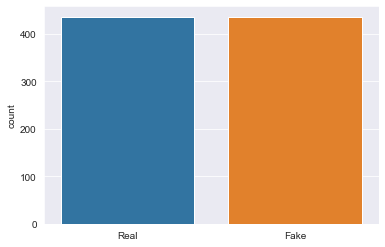

In [32]:
l = []
for i in train:
    if (i[1] == 0):
        l.append("Real")
    else:
        l.append("Fake")
sns.set_style('darkgrid')
sns.countplot(l)

In [44]:
train[-1][0].shape

(224, 224, 3)

Random 

plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'fake')

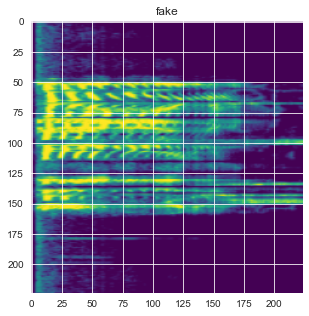

In [34]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

## Preprocesing

In [55]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

In [54]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [77]:
x_train[0]

(224, 224, 3)

In [87]:
get_zero_pad(x_train[0:10])

max_length 224
curr_length 224
pad_length 0
len(arr.shape) > 1


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

In [123]:
a = np.zeros((0, )*3)

In [121]:
a

array([], shape=(0, 3, 0, 3, 0, 3), dtype=float64)

In [86]:
def get_zero_pad(batch_input):
    # find max length
    max_length = np.max([len(x) for x in batch_input])
    print(f'max_length {max_length}')
    for i, arr in enumerate(batch_input):
        curr_length = len(arr)
        print(f'curr_length {curr_length}')
        pad_length = max_length - curr_length
        print(f'pad_length {pad_length}')
        if len(arr.shape) > 1:
            print(f'len(arr.shape) > 1')
            print(np.zeros((pad_length, arr.shape[-1])))
            arr = np.concatenate([arr, np.zeros((pad_length, arr.shape[-1]))])
            print(f'arr {arr}')
        else:
            print(f'else')
            arr = np.concatenate([arr, np.zeros((pad_length))])
            print(f'arr {arr}')
        batch_input[i] = arr
    return batch_input

In [66]:
get_zero_pad(x_train[0:1])

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

In [22]:
class DataGenerator(keras.utils.Sequence):
    def __init__(self, x_set, y_set=None, sample_weights=None, vd3=32, shuffle=False, mode='train'):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.mode = mode
        self.sample_weights = sample_weights
        if self.mode != 'train':
            self.shuffle = False
        self.n = 0
        self.max = self.__len__()

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x = get_zero_pad(batch_x)
        # batch_x = random_truncate_array(batch_x)
        batch_x = np.array(batch_x)
        batch_x = batch_x.reshape((len(batch_x), -1, hparams.num_mels))
        if self.mode != 'test':
            batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        # read your data here using the batch lists, batch_x and batch_y
        if self.mode == 'train':
            return np.array(batch_x), np.array(batch_y)
        if self.mode == 'val':
            return np.array(batch_x), np.array(batch_y)
        if self.mode == 'test':
            return np.array(batch_x)

    def __next__(self):
        if self.n >= self.max:
            self.n = 0
        result = self.__getitem__(self.n)
        self.n += 1
        return result

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

## Model

In [45]:
input_shape = (img_size, img_size, 3)

In [46]:
model = Sequential(
    [
        Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(2, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 186624)            0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 186624)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)               

In [19]:
model2 = Sequential()
model2.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model2.add(MaxPool2D())

model2.add(Conv2D(32, 3, padding="same", activation="relu"))
model2.add(MaxPool2D())

model2.add(Conv2D(64, 3, padding="same", activation="relu"))
model2.add(MaxPool2D())
model2.add(Dropout(0.4))

model2.add(Flatten())
model2.add(Dense(128,activation="relu"))
model2.add(Dense(2, activation="softmax"))

model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 28, 64)       

In [47]:
opt = Adam(lr=0.1)
model.compile(optimizer = opt , loss='binary_crossentropy', metrics = ['accuracy'])

In [48]:
train_generator = DataGenerator(x_train, y_train)

In [49]:
validation_generator = DataGenerator(x_val, y_val)

In [50]:
class_weights = {1: 5, 0: 1}

In [52]:

history = model.fit(train_generator, 
            steps_per_epoch = len(train_generator),
            epochs = 100,
            validation_data=validation_generator,
            shuffle = False,
            use_multiprocessing = True,
            verbose = 1,
            class_weight =class_weights
)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

In [ ]:
history = model.fit(x_train,y_train,epochs = 100 , validation_data = (x_val, y_val))

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]

In [ ]:
print(classification_report(y_val, predictions, target_names = ['Real (Class 0)','Fake (Class 1)']))

# Stand By

In [ ]:
# test_data.extend(np.load(os.path.join(f'{base_data_path}/preprocessed_data', f'test_preproc.npy'), allow_pickle=True))

In [ ]:
train_data = sorted(train_data, key = lambda x: len(x[0]))
val_data = sorted(val_data, key = lambda x: len(x[0]))
# test_data= sorted(test_data, key = lambda x: len(x[0]))

In [ ]:
xtrain = [x[0] for x in train_data]
xval = [x[0] for x in val_data]

In [ ]:
xtrain = [x[0] for x in train_data]
ytrain = [x[1] for x in train_data]
xval = [x[0] for x in val_data]
yval = [x[1] for x in val_data]
#xtest = [x[0] for x in test_data]
#ytest = [x[1] for x in test_data]

In [ ]:
del train_data, val_data#, test_data

In [ ]:
gc.collect()

In [ ]:
type(xtrain)

In [ ]:
plt.figure(figsize = (10,10))

plt.imshow(xtrain[0])

## Data Generator (Optional)

In [ ]:
#x_train = np.array(xtrain) / 255
#x_val = np.array(xval) / 255

In [ ]:
#x_train.reshape(-1, img_size, img_size, 1)
#y_train = np.array(y_train)

#x_val.reshape(-1, img_size, img_size, 1)
#y_val = np.array(y_val)

In [ ]:
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.2, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip = True,  # randomly flip images
#         vertical_flip=False)  # randomly flip images

In [ ]:
#datagen.fit(xtrain)

## Model

In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

In [ ]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
type(xtrain[0])

In [ ]:
# x_train = np.array(np.array(xtrain))
# # y_train = np.array(ytrain)
# x_val = np.array(xval)
# #y_val = np.array(yval)

In [ ]:
# del x_train, x_val

In [ ]:
gc.collect()

In [ ]:
xtrain = [tf.convert_to_tensor(i, dtype=tf.float32) for i in xtrain]
#y_train = [tf.convert_t_tensor(i, dtype=tf.float32) for i in ytrain]
xval = [tf.convert_to_tensor(i, dtype=tf.float32) for i in xval]
#y_val = [tf.convert_to_tensor(i, dtype=tf.float32) for i in yval] 
# y_train=np.asarray(y_train).astype(np.int)

In [ ]:
type(xtrain)

In [ ]:
len(xtrain)

In [ ]:
#xtrain = np.array(xtrain, dtype=object)
ytrain = np.array(ytrain)
#xval = np.array(xval, dtype=object)
yval = np.array(yval)

In [ ]:
type(ytrain)

In [ ]:
history = model.fit(xtrain, ytrain, epochs=500 , validation_data = (xval, yval))

In [ ]:
type(x_val[0])

In [ ]:
type(x_val[0])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions = model.predict_classes(xval)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(yval, predictions, target_names = ['Real (Class 0)','Fake (Class 1)']))